In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random 
import seaborn as sns

This script basically enables me to understand the datatset and also clean it for discripancies 

In [2]:
#enter file name file location and convertt into a pandas datafram fro cleaning
file_name = '2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv'

#load file pandas!
df = pd.read_csv(file_name)
df.head(5)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [4]:
#convert the Date column to datetime format 
df['Date']= pd.to_datetime(df['Date'], format='%m%d%Y')
df.Date.head(5)

0   2018-10-14
1   2018-10-06
2   2018-10-10
3   2018-10-18
4   2018-10-18
Name: Date, dtype: datetime64[ns]

In [38]:
#Grouping the data by DAy of Week 
df['Day of Week'] = df['Date'].dt.day_name()
df['Day of Week'].value_counts()

Saturday     837
Sunday       773
Wednesday    548
Friday       375
Monday       285
Thursday     200
Name: Day of Week, dtype: int64

In [49]:
(df['Date'].value_counts())

2018-10-13    434
2018-10-07    405
2018-10-14    368
2018-10-06    336
2018-10-10    332
2018-10-08    285
2018-10-12    218
2018-10-17    216
2018-10-18    200
2018-10-19    157
2018-10-20     67
Name: Date, dtype: int64

In [5]:
#trying to understand the dataset

##check if there are reecuring squirrel
if len(df['Unique Squirrel ID'].unique()) != len(df['Unique Squirrel ID']):
    print('There are repeating "Unique Squirrel ID"')
    print (len(df['Unique Squirrel ID'])- len(df['Unique Squirrel ID'].unique()))   
else:
    print ('There was no recuring IDs')
    

There are repeating "Unique Squirrel ID"
5


In [6]:
##Diving into the 'Unique Squirrel ID'

In [7]:
#So lets's dive deeper and find if those repeating id were identical '
df[df['Unique Squirrel ID'].duplicated()]

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
2167,-73.958236,40.798775,40B-AM-1019-06,40B,AM,2018-10-19,6,Juvenile,Gray,White,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9582363437135 40.7987752300505)
2234,-73.974852,40.771959,7D-PM-1010-01,07D,PM,2018-10-10,1,Adult,Gray,White,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9748522796455 40.7719586621003)
2271,-73.956967,40.794879,37E-PM-1006-03,37E,PM,2018-10-06,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9569670900695 40.794879285681304)
2613,-73.976588,40.766095,1F-AM-1010-04,01F,AM,2018-10-10,4,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9765877920583 40.7660946071574)
2888,-73.977165,40.769305,4C-PM-1010-05,04C,PM,2018-10-10,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9771646835311 40.7693049165084)


In [8]:
df[df['Unique Squirrel ID'] == '37E-PM-1006-03']

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,2018-10-06,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2271,-73.956967,40.794879,37E-PM-1006-03,37E,PM,2018-10-06,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9569670900695 40.794879285681304)


After considering the reoccuring 'Unique Squirrel ID', i made judgement to drop nthe reoccuring rows based on the folllowing judgements

1)cordinates(X,Y) was the only different value, all other column values were the same, this migjht be the same squirrel was found at a differen location  
2)Since the number of recurrin values are not >10 and the data set spans over 3000 

LIMITATION 
-the reoccuring values were mostly concentrated in the (Primary Fur Color = Grey) and (Age = Adult ) categories 

In [9]:
df = df.drop_duplicates(subset = ['Unique Squirrel ID'])

##Diving into the age column

In [10]:
print(df['Age'].unique())
df['Age'].value_counts()

[nan 'Adult' 'Juvenile' '?']


Adult       2564
Juvenile     329
?              4
Name: Age, dtype: int64

In [11]:
#lets Clean 'Age' Column

#for '?' values
df['Age'][df['Age'] == '?'] = 'Unknown'

#for null values
len(df['Age'][df['Age'].isna()])
if len(df['Age'][df['Age'].isna()]) > 0 :
    df['Age'][df['Age'].isna()] = 'Unknown'
    print('All null values have benn  converted to "Unknown"')
else:
    pass

All null values have benn  converted to "Unknown"


C:\Users\Owner\AppData\Local\Temp/ipykernel_17312/1906511088.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'].isna()] = 'Unknown'


<AxesSubplot:>

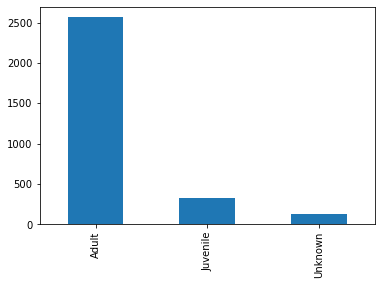

In [12]:
(df['Age'].value_counts()).plot(kind = 'bar')

### DIVING INTO THE PRIMARY FUR COLOUR 

In [13]:
df['Primary Fur Color'].value_counts()

Gray        2468
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

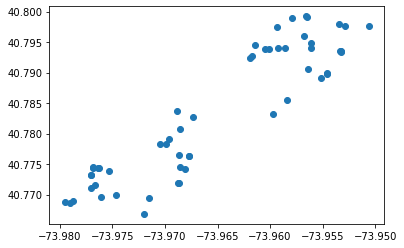

In [14]:
a = df[df['Primary Fur Color'].isna()]
plt.scatter(a.X, a.Y)

there are not all concertrated in one region.
Deleting this would redmuce our level of confidence of this dataset
Inlplace of deleting, we will evaluate as 'Not Specified'


In [15]:
df['Primary Fur Color'][df['Primary Fur Color'].isna()] = 'Not Specified'
df['Primary Fur Color'].value_counts()

Gray             2468
Cinnamon          392
Black             103
Not Specified      55
Name: Primary Fur Color, dtype: int64

In [16]:
#checking for values that has null values in both 'Age' and 'Primary Fur Color'
len(df[(df['Age']== 'No Value') & (df['Primary Fur Color'] == 'Not Specified')])

0

### DIVING INTO THE Highlight Fur Color 

In [17]:
print('Count Null values "Highlight Fur Color"=', len(df[df['Highlight Fur Color'].isna()]))
df['Highlight Fur Color'].value_counts()

Count Null values "Highlight Fur Color"= 1085


Cinnamon                  765
White                     583
Cinnamon, White           268
Gray                      170
Gray, White                59
Black                      34
Black, Cinnamon, White     32
Black, White               10
Black, Cinnamon             9
Gray, Black                 3
Name: Highlight Fur Color, dtype: int64

In [18]:
#for null values, we describe as no highlited colour
df['Highlight Fur Color'][df['Highlight Fur Color'].isna()] = 'No Highlight'


In [19]:
#we can now calculate the percentage of 'No highlight'
per_no_highlight = (len(df[df['Highlight Fur Color'] == 'No Highlight'])/len(df['Highlight Fur Color']))*100
print(f"The Squirrel_ with 'No Highlight' compose of {per_no_highlight} of the population")

The Squirrel_ with 'No Highlight' compose of 35.95096090125911 of the population


### 'Location' and 'Specific Location'

In [20]:
#unique count of 'Location' values 
df.Location.value_counts()

Ground Plane    2111
Above Ground     843
Name: Location, dtype: int64

In [21]:
#filling up th null
##we will fill up the nulls as 'Not Specified'
df['Location'][df['Location'].isna()] = 'Not Specified'

In [22]:
df.Location.value_counts()

Ground Plane     2111
Above Ground      843
Not Specified      64
Name: Location, dtype: int64

In [23]:
#Above Ground Sighter Measurement
df['Above Ground Sighter Measurement'].value_counts()

#note that Ground plane are the FALSE values are the ones which df['Location'] == 'Ground Plane'
df['Above Ground Sighter Measurement'][df['Above Ground Sighter Measurement'] == 'FALSE'] = 0

In [24]:
print('Null values in "Above Ground Sighter Measurement" :', len(df['Above Ground Sighter Measurement'][df['Above Ground Sighter Measurement'].isna()]))

Null values in "Above Ground Sighter Measurement" : 114


In [25]:
#Coundt of Null values as it relates 'Location'
(df[['Location']][(df['Above Ground Sighter Measurement'].isna())]).value_counts()

Location     
Not Specified    64
Above Ground     50
dtype: int64

For null values in 'Location' Column are distributed between 'Not Specified' and 'Above Ground'
Rememmber that the noty specified were used to denote null values in the location column, 
-Thus, i choose to use 'Not speccified' in the rows that has Null values in both 'Location' and 'Above Ground Sighter Measurement'
-For Values that have 'Location' ==  'Above Ground', i'll distribute about the mean and with the standard devaiton  

In [26]:
df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].isna())
                                       &(df['Location'] == 'Not Specified')] = 'Not Specified'


C:\Users\Owner\AppData\Local\Temp/ipykernel_17312/1498228174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].isna())


In [27]:
(df[['Location']][(df['Above Ground Sighter Measurement'].isna())]).value_counts()

Location    
Above Ground    50
dtype: int64

In [28]:
abv_grnd = pd.Series(df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].notna()) 
                                       & (df['Above Ground Sighter Measurement'] != 'Not Specified')
                                      & (df['Above Ground Sighter Measurement'] != 0)]).astype(int)
abv_grnd = abv_grnd[abv_grnd!= 0]

In [29]:
print(abv_grnd.describe())

#Applying the empirical Rule, we will distibute the 'Nan' between 1.5std of mean 
#recall that the empirical rule 68% of scorres are between 1std of mean and 95% btw 2 std of mean
#This is done to avoid skewing the distribution

lw = 1
hw = int(abv_grnd.mean() + ((1.5)*(abv_grnd.std())))

df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].isna())] = [i for i in np.random.randint(1,hw,50)]

count    792.000000
mean      15.229798
std       15.503280
min        1.000000
25%        5.000000
50%       10.000000
75%       20.000000
max      180.000000
Name: Above Ground Sighter Measurement, dtype: float64


C:\Users\Owner\AppData\Local\Temp/ipykernel_17312/3825756296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].isna())] = [i for i in np.random.randint(1,hw,50)]


In [30]:
ab = pd.DataFrame(df['Above Ground Sighter Measurement'][(df['Above Ground Sighter Measurement'].isna())])
ab['Above Ground Sighter Measurement'] =  [i for i in np.random.randint(1,hw,50)]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3018 entries, 0 to 3022
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   X                                           3018 non-null   float64       
 1   Y                                           3018 non-null   float64       
 2   Unique Squirrel ID                          3018 non-null   object        
 3   Hectare                                     3018 non-null   object        
 4   Shift                                       3018 non-null   object        
 5   Date                                        3018 non-null   datetime64[ns]
 6   Hectare Squirrel Number                     3018 non-null   int64         
 7   Age                                         3018 non-null   object        
 8   Primary Fur Color                           3018 non-null   object        
 9   Highligh

## SAVING CLEANED  FILE TO CSV

In [32]:
df.to_csv('cleaned_ squirrel_data.csv', index=False )

# VISUALIZING DATA

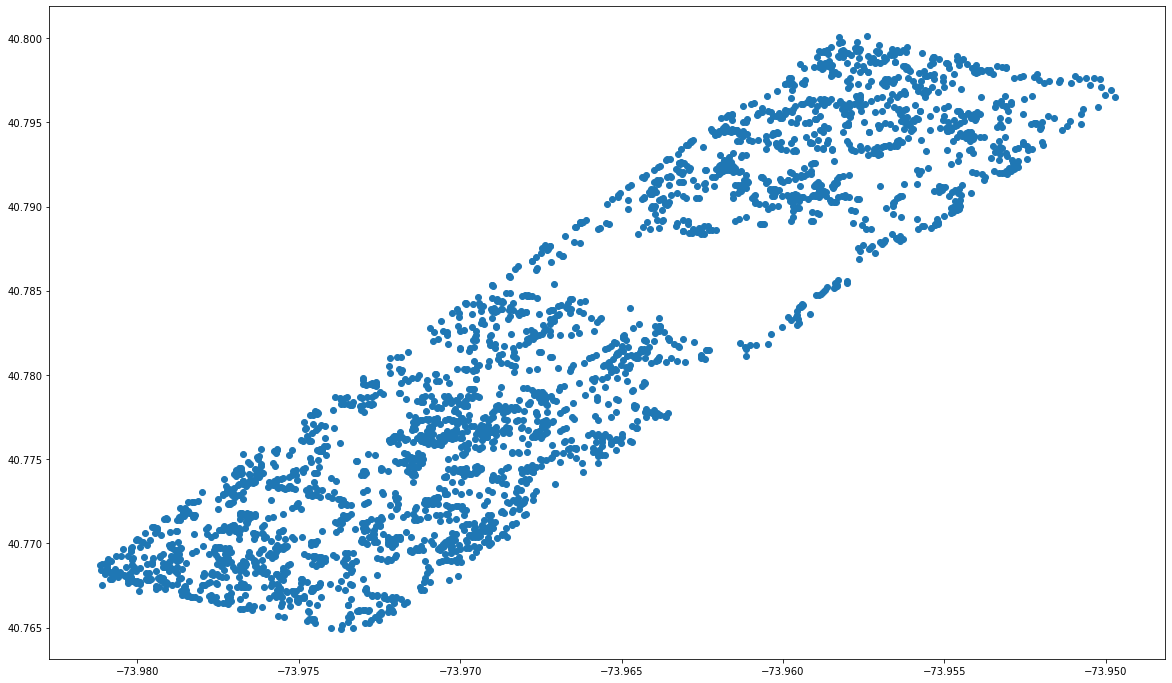

In [33]:
plt.figure(figsize =(20,12))
plt.scatter(df['X'], df['Y'])

The Parkis illustrated as  rectangulart

In [ ]:
sns.set_theme()
data = sns.load_dataset()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2736x1080 with 0 Axes>

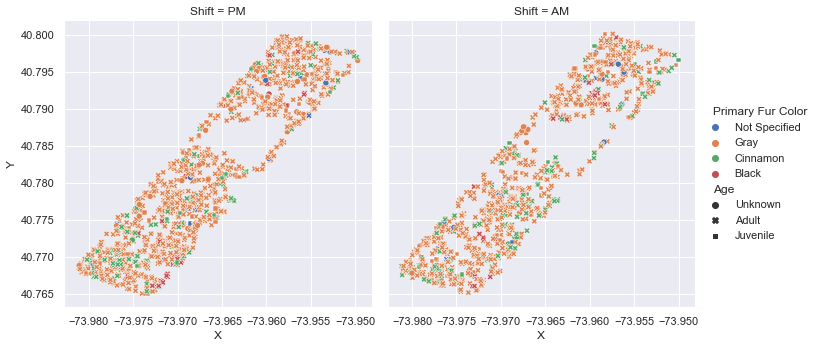

In [66]:
sns.set_theme(style="darkgrid")
plt.figure(figsize =(38,15))
sns.relplot(df.X, df.Y, style = df.Age, hue = df['Primary Fur Color'] ,col = df.Shift)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x864 with 0 Axes>

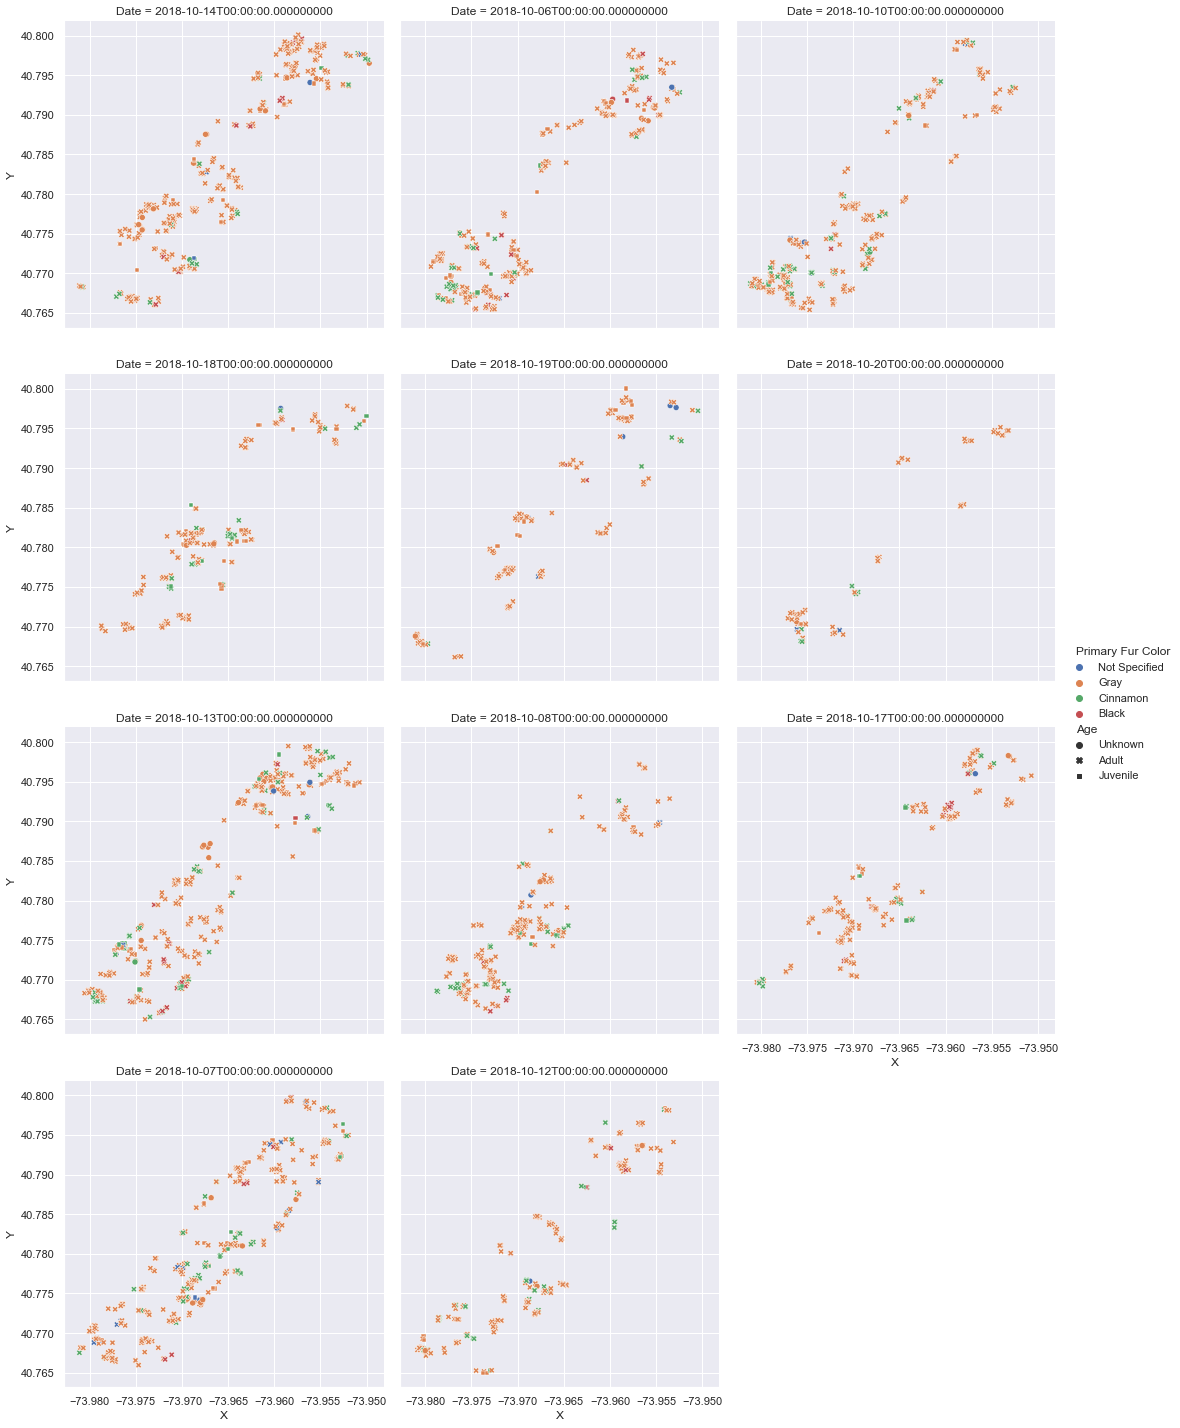

In [71]:
plt.figure(figsize =(20,12))
sns.relplot(df.X, df.Y, style = df.Age, hue = df['Primary Fur Color'] ,col = df.Date, col_wrap=3)

<AxesSubplot:xlabel='Date', ylabel='Count'>

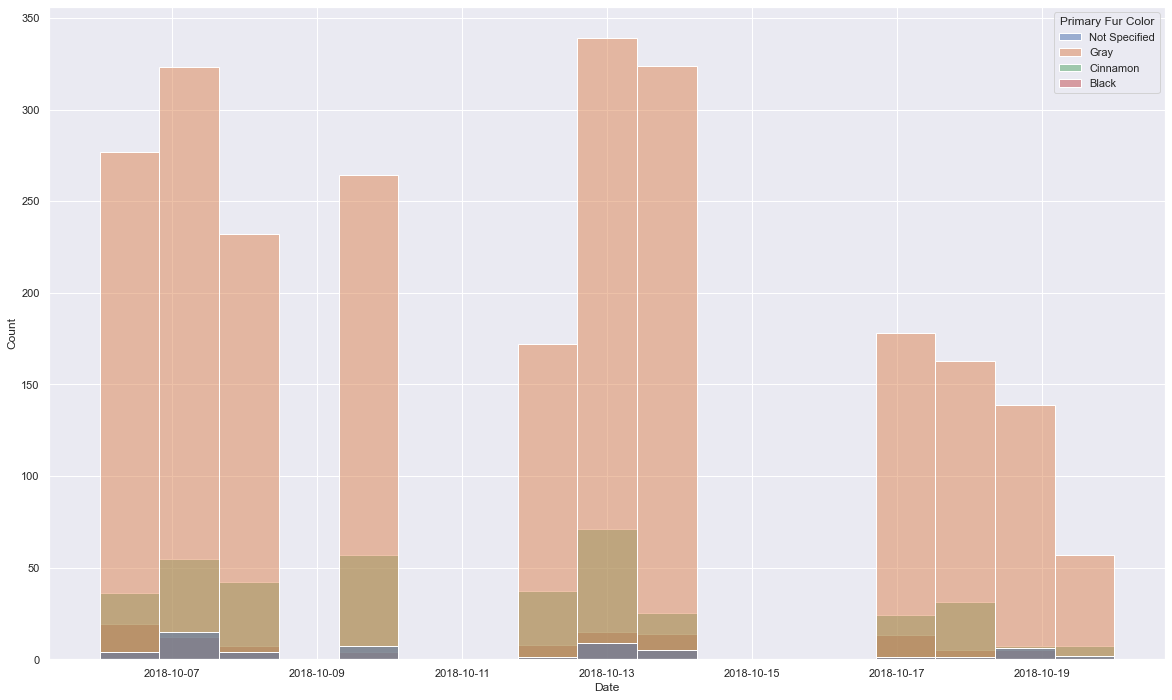

In [84]:
sns.histplot(x =df["Date"], hue = df['Primary Fur Color'])


<AxesSubplot:xlabel='Age', ylabel='Count'>

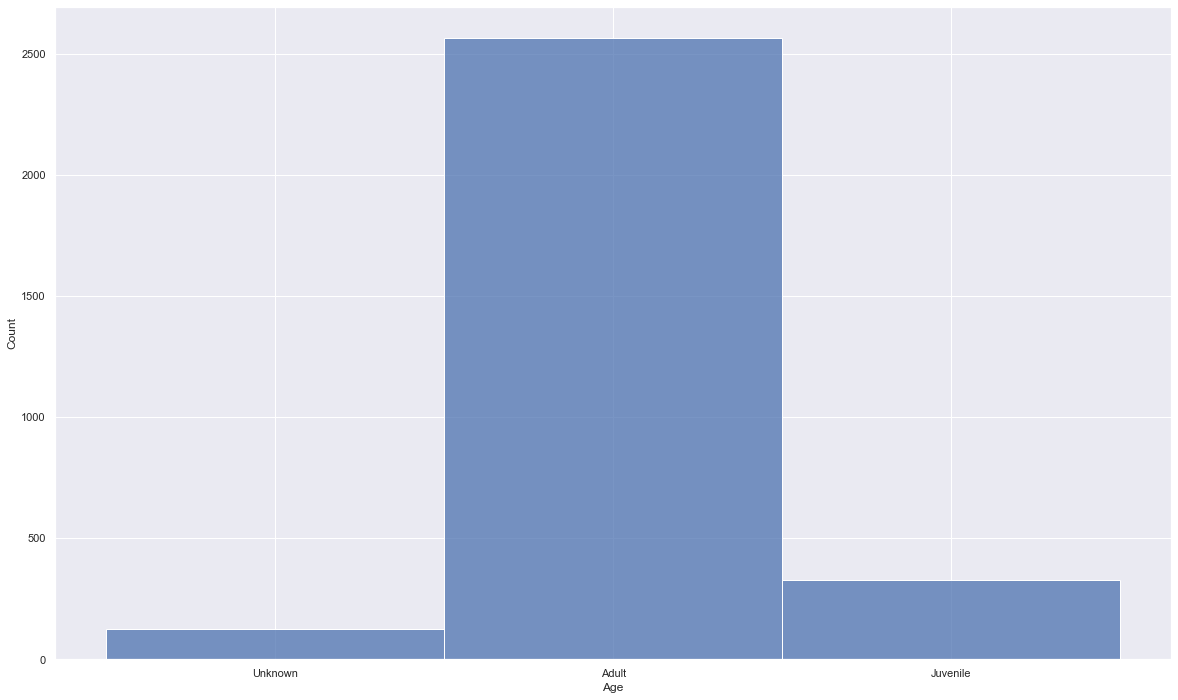

In [78]:
sns.histplot(x =df["Age"])

<AxesSubplot:xlabel='Location', ylabel='Count'>

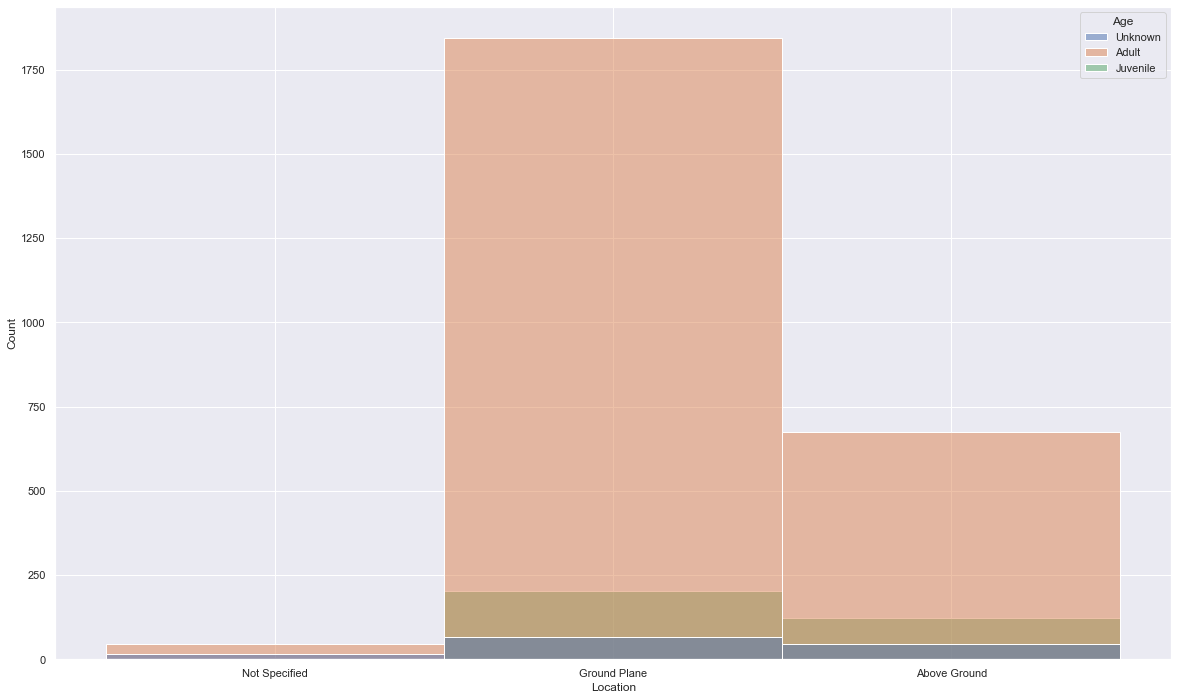

In [82]:
sns.histplot(x =df["Location"],hue = df['Age'])

<AxesSubplot:xlabel='Primary Fur Color', ylabel='Count'>

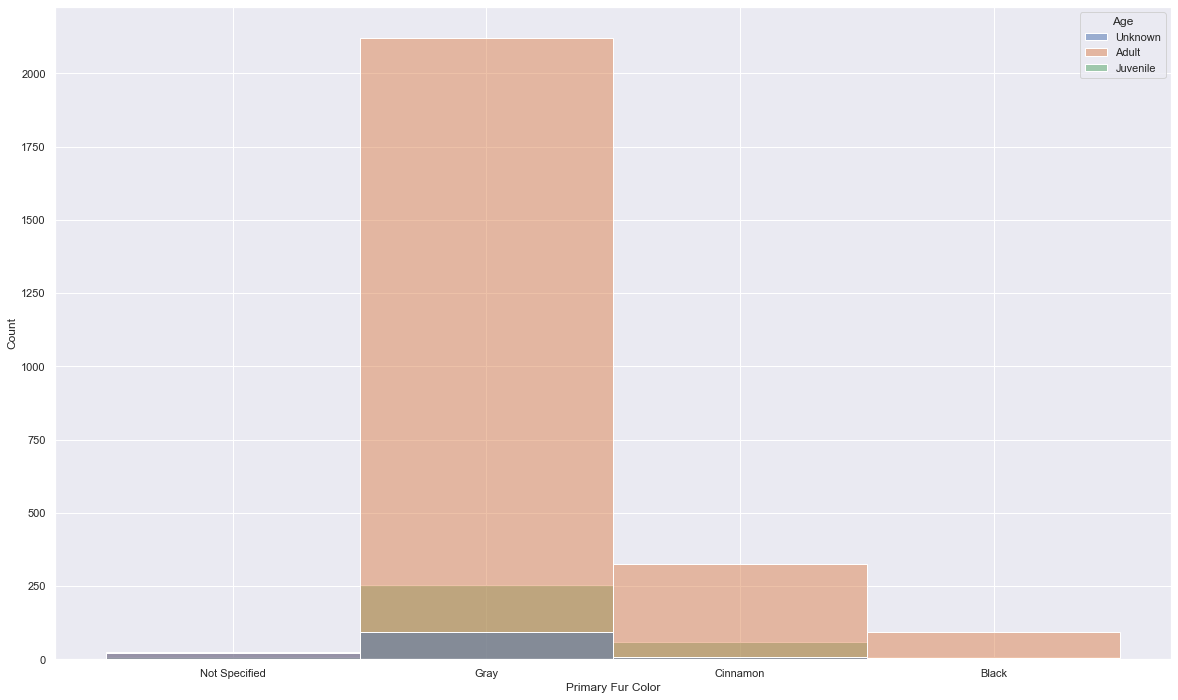

In [81]:
sns.histplot(x =df["Primary Fur Color"], hue = df['Age'])